<a href="https://colab.research.google.com/github/AntonioZN23/Challenge-3-Telecom-X-parte-2/blob/main/TelecomX_Latam_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Alura Challenge Telecom X parte 2/DataFrame_TelecomX_parte_1.csv')

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

## **Preparacion de datos**

In [ ]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tiempo,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cargos Mensuales,Cargos Totales,Cargos Diarios
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tiempo            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [ ]:
for i in df.index:
  if pd.isna(df['Cargos Totales'][i]):
    df.drop(i,axis='index',inplace=True)

In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tiempo', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Cargos Mensuales',
       'Cargos Totales', 'Cargos Diarios'],
      dtype='object')

In [ ]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tiempo,PhoneService,Cargos Mensuales,Cargos Totales,Cargos Diarios
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


In [ ]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1})

/tmp/ipython-input-35551863.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male':0,'Female':1})


In [ ]:
categoricas = df.drop(columns=['customerID','Churn','Cargos Mensuales','Cargos Totales','Cargos Diarios','SeniorCitizen','gender','Partner','Dependents','tiempo','PhoneService'])

In [ ]:
df_categorias = pd.get_dummies(data=categoricas,columns=categoricas.columns,dtype=int)
df_categorias.sample(2)

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6691,0,1,0,1,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,1
2300,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
#Proporcion de Abandono
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


## **Correlacion y Seleccion de variables**

In [ ]:
df_completo = df_categorias.join(df[['Churn','Cargos Mensuales','Cargos Totales','SeniorCitizen','gender','Partner','Dependents','tiempo','PhoneService']])

In [ ]:
corr = df[['Churn','Cargos Mensuales','Cargos Totales','SeniorCitizen','gender','Partner','Dependents','tiempo','PhoneService']].corr()

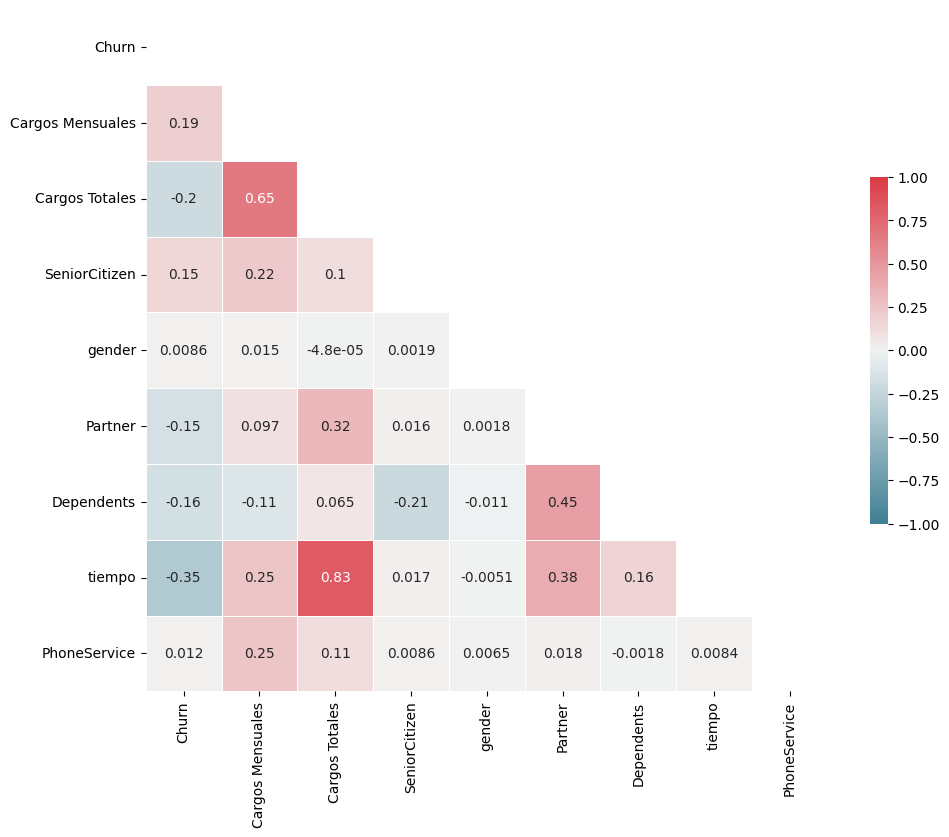

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
#Correlacion variables no codificadas, se elimino Charges.Monthly por su fuerte correlacion con tiempo y cargos mensuales
#df_completo = df_completo.drop(columns=['Cargos Totales'])

In [ ]:
import plotly.express as px
px.box(df_completo,x='tiempo',color='Churn',title='Tenencia vs abandono')

In [ ]:
#Con esta grafica se busca demostrar el motivo por el cual se decidio sacar a Cargos Totales del DF que se utilziara para el modelo de ML
px.box(df,x='Cargos Totales',color='Churn',title='Cargos Totales vs abandono')

In [ ]:
px.box(df_completo,x='Cargos Mensuales',color='Churn',title='Cargos Mensuales vs abandono')

## **Modelo predictivo**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_completo.drop(columns=['Churn'])
y = df_completo['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train,y_train)

dummy.score(X_test,y_test)

0.73450070989115

### **Arbol de Decision**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train,y_train)
modelo_arbol.score(X_test,y_test)

0.7288215806909607

In [ ]:
from sklearn.metrics import confusion_matrix
y_previsto = modelo_arbol.predict(X_test)
matriz_confusion = confusion_matrix(y_test,y_previsto)
print(matriz_confusion)

[[1255  297]
 [ 276  285]]


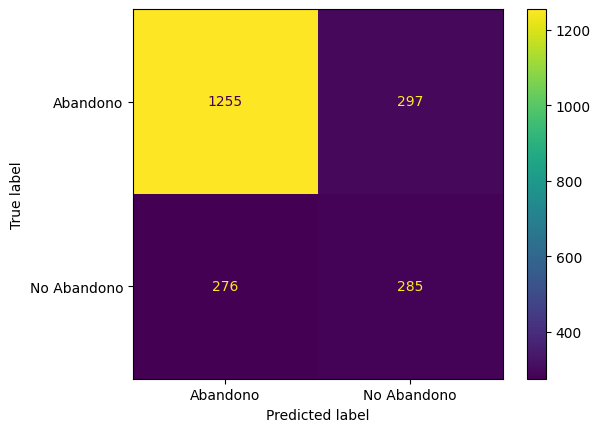

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacion = ConfusionMatrixDisplay(matriz_confusion,display_labels=['Abandono','No Abandono'])
visualizacion.plot();

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelo_bosque = RandomForestRegressor(random_state=5,max_depth=7)
modelo_bosque.fit(X_train,y_train)
modelo_bosque.score(X_test,y_test)

0.29570915584998125

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



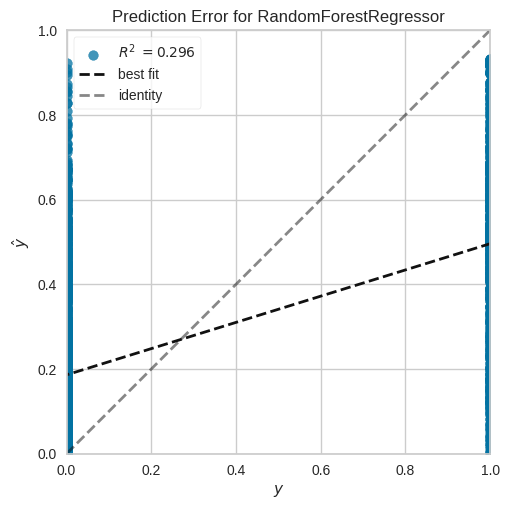

In [ ]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo_bosque, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



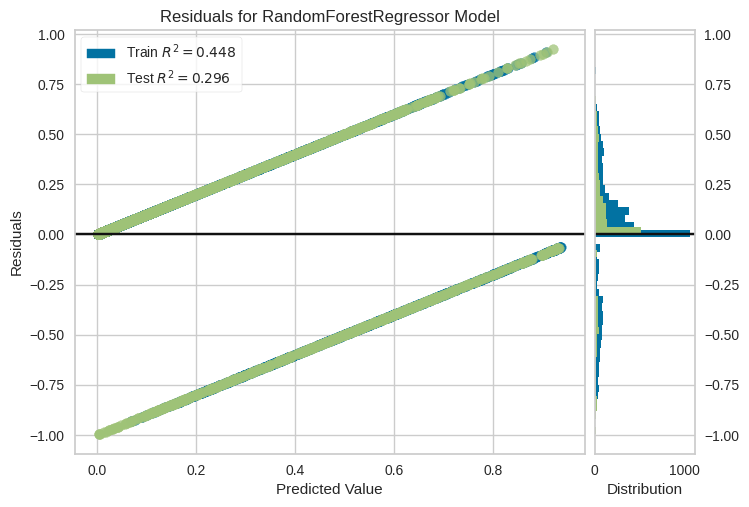

In [ ]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo_bosque, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.model_selection import KFold,cross_validate

scoring = {
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

cv = KFold(n_splits=5,shuffle=True,random_state=42)
cv_results = cross_validate(modelo_bosque, X_train, y_train, scoring = scoring, cv = cv)
cv_results

{'fit_time': array([2.12470007, 1.51668739, 1.84605408, 1.9862051 , 1.30501533]),
 'score_time': array([0.02014422, 0.03193212, 0.02830958, 0.02025771, 0.02213645]),
 'test_RMSE': array([-0.37367571, -0.37011796, -0.36465163, -0.37317403, -0.36441282]),
 'test_MAE': array([-0.27050248, -0.26398363, -0.2667611 , -0.26992769, -0.26881076]),
 'test_R2': array([0.26416149, 0.29790757, 0.33129687, 0.26224897, 0.34116951])}

In [ ]:
importances = modelo_bosque.feature_importances_

In [ ]:
feature_importances = pd.DataFrame({'Features':X.columns,'importances':(importances*100).round(2)}).sort_values('importances',ascending=False)
feature_importances

,Features,importances
24,Contract_Month-to-month,37.08
39,tiempo,14.59
33,Cargos Mensuales,10.61
34,Cargos Totales,10.60
4,InternetService_Fiber optic,9.30
31,PaymentMethod_Electronic check,2.22
15,TechSupport_No,1.75
6,OnlineSecurity_No,1.51
35,SeniorCitizen,1.03
36,gender,0.81


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
resultados = pd.DataFrame(index=['RMSE','mae','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,40,2)]

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE':round(mae,4),
      'R2':round(r2,4)
  }
  return metricas

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel,y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38
RMSE,0.4075,0.4012,0.3763,0.3737,0.3718,0.3716,0.3714,0.3714,0.3712,0.3712,0.3712,0.3712,0.3710,0.3709,0.3705,0.3705,0.3705,0.3705,0.3705,0.3705
mae,0.3300,0.3171,0.2798,0.2763,0.2752,0.2752,0.2750,0.2751,0.2747,0.2749,0.2749,0.2749,0.2751,0.2751,0.2749,0.2750,0.2750,0.2750,0.2750,0.2750
R2,0.1487,0.1746,0.2737,0.2839,0.2910,0.2918,0.2927,0.2926,0.2935,0.2933,0.2934,0.2936,0.2941,0.2945,0.2962,0.2960,0.2961,0.2959,0.2961,0.2961


In [ ]:
selected_features = feature_importances['Features'].values[:27]
X_selected_features = X[selected_features]
X_selected_features

,Contract_Month-to-month,tiempo,Cargos Mensuales,Cargos Totales,InternetService_Fiber optic,PaymentMethod_Electronic check,TechSupport_No,OnlineSecurity_No,SeniorCitizen,gender,...,TechSupport_Yes,Partner,PaymentMethod_Mailed check,OnlineSecurity_Yes,StreamingTV_Yes,MultipleLines_No phone service,StreamingTV_No,StreamingMovies_No,PhoneService,PaymentMethod_Bank transfer (automatic)
0,0,9,65.60,593.30,0,0,0,1,0,1,...,1,1,1,0,1,0,0,1,1,0
1,1,9,59.90,542.40,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,1,4,73.90,280.85,1,1,1,1,0,0,...,0,0,0,0,0,0,1,1,1,0
3,1,13,98.00,1237.85,1,1,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,1,3,83.90,267.40,1,0,0,1,1,1,...,1,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,0,0,0,0,0,1,...,1,0,1,1,0,0,1,1,1,0
7039,1,22,85.10,1873.70,1,1,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
7040,1,2,50.30,92.75,0,0,1,1,0,0,...,0,0,1,0,0,0,1,1,1,0
7041,0,67,67.85,4627.65,0,0,0,0,0,0,...,1,1,1,1,0,0,1,0,1,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_selected_features,y,random_state=42)

In [ ]:
param_grid = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,150,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5,shuffle=True,random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2',cv=cv)
model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [ ]:
model_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

{'RMSE': 0.3697, 'MAE': 0.2744, 'R2': 0.2917}

## **Normalizando Datos**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalizacion = MinMaxScaler()
X_train_normalizada = normalizacion.fit_transform(X_train)
X_test_normalizada = normalizacion.fit_transform(X_test)

pd.DataFrame(X_train_normalizada)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,0.166667,0.618953,0.107477,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.583333,0.556110,0.370482,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.0,0.111111,0.357606,0.049498,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,1.000000,0.008978,0.148396,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.527778,0.705237,0.383476,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.0,0.638889,0.015461,0.102498,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5278,1.0,0.013889,0.007481,0.000040,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5279,0.0,0.055556,0.054863,0.009081,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5280,1.0,0.013889,0.011471,0.000087,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_normalizada,y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
knn.score(X_test,y_test)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## **Modelo OLS**

In [ ]:
from statsmodels.formula.api import ols

modelo_0 = ols(data=X_train).fit()

PatsyError: Error evaluating factor: NameError: name 'linear' is not defined
    linear
    ^^^^^^

## **Modelo campeon**

In [ ]:
import pickle

file_path = '/content/champion.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))